In [1]:
import pickle
from utils import Config

db = pickle.load(open(Config.db_path, 'rb'))

Number of papers: 2878

In [2]:
MY_STOPWORDS = ["using", "ieee", "fig", "ieee", "pp"]

In [3]:
# plot word cloud from list of dicionaries with frequencies

from os import path
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

def plot_word_cloud(word_dict, filename="wordcloud.png"):
    # get data directory (using getcwd() is needed to support running example in generated IPython notebook)
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

    alice_coloring = np.array(Image.open(path.join(d, "cloud8.jpg")))
    stopwords = set(STOPWORDS)
    stopwords.update(MY_STOPWORDS)
    
    for w in stopwords:
        word_dict.pop(w, None)

    wc = WordCloud(background_color="white", max_words=100, mask=alice_coloring,
                   stopwords=stopwords, random_state=42)
    # generate word cloud
    wc.generate_from_frequencies(word_dict)

#     # create coloring from image
#     image_colors = ImageColorGenerator(alice_coloring)
    
#     fig, axes = plt.subplots(1, 3, figsize=(10,90))
#     axes[0].imshow(wc, interpolation="bilinear")
#     # recolor wordcloud and show
#     # we could also give color_func=image_colors directly in the constructor
#     axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#     axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
#     for ax in axes:
#         ax.set_axis_off()
#     plt.show()
    
    figure(figsize=(30, 30))
    plt.imshow(wc)

    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight')

In [4]:
def extract_authors(db_items):
    _authors = {}
    for pid, j in db_items:
        _authors[pid] = [author["name"] for author in j["authors"]]
    return _authors

In [5]:
def extract_categories(db_items):
    _cats = {}
    for pid, j in db_items:
        _cats[pid] = [tag["term"] for tag in j["tags"]]
    return _cats

In [6]:
authors = extract_authors(db.items())
categories = extract_categories(db.items())
# authors

In [7]:
authors3 = \
"""Alessandro Barp

Emmanuel J. Candès
Jun Wang
Shuai Wang
Jochen De Weerdt
Adam Lerer
Jun Li

"""

authors3 = authors3.split("\n")
authors3[:5]

['Alessandro Barp', '', 'Emmanuel J. Candès', 'Jun Wang', 'Shuai Wang']

In [8]:
cates1 = ["cs.AI", "math.ST", "stat.ML", "q-bio.NC", "q-bio.QM", "q-bio.TO"]
cates = dict()
for c in cates1:
    cates[c] = 0

In [9]:
for pid, j in db.items():
    ncats = [tag["term"] for tag in j["tags"]]
    for cate in cates.keys():
        if cate in ncats:
            cates[cate] += 1
cates

{'cs.AI': 1034,
 'math.ST': 234,
 'stat.ML': 758,
 'q-bio.NC': 69,
 'q-bio.QM': 72,
 'q-bio.TO': 19}

In [10]:
for pid, j in db.items():
    nauth = [author["name"] for author in j["authors"]]
    if any([x in nauth for x in authors3]):
        ncats = [tag["term"] for tag in j["tags"]]
        if any([x in ncats for x in ["q-bio.NC"]]):
            print()
            pprint.pprint(j)

In [11]:
meta = pickle.load(open(Config.meta_path, 'rb'))
out = pickle.load(open(Config.tfidf_path, 'rb')) # features - tf idf words per documents matrix

In [12]:
from utils import strip_version
xtoi = { strip_version(x):i for x,i in meta['ptoi'].items() }
len(xtoi)

2566

In [13]:
len(meta['vocab'])

5000

In [14]:
meta.keys()

dict_keys(['vocab', 'idf', 'pids', 'ptoi'])

In [15]:
meta["idf"]

array([3.25207122, 2.59666437, 3.50815893, ..., 6.36558653, 3.7265292 ,
       4.5878133 ])

# Authors

In [16]:
all_authors = {}
all_authors_works = {}

for pid, _authors in authors.items():
    for author in _authors:
        if author in all_authors_works:
            all_authors_works[author].append(pid)
        else:
            all_authors_works[author] = [pid]
        if author == "Yaroslav Ganin":
            print(pid, _authors)
        try:
            all_authors[author] = all_authors.get(author, []) + [out["X"][xtoi[pid]]]
        except KeyError:
            pass

for author in all_authors.keys():
    all_authors[author] = sum(all_authors[author]).toarray()

2105.02769 ['Yaroslav Ganin', 'Sergey Bartunov', 'Yujia Li', 'Ethan Keller', 'Stefano Saliceti']


In [17]:
# Number of authors
len(all_authors)

9113

In [18]:
for key, value in all_authors_works.items():
    if len(value) == 2:
        print(key)

Alessandro Barp
Jian Cheng Wong
Sergey Bartunov
Sebastian Risi
Wolfram Burgard
Huan Liu
Shreyas Hampali
Sayan Deb Sarkar
Vincent Lepetit
Emre Neftci
Ansgar Scherp
Adarsha Balaji
Shihao Song
Anup Das
Nagarajan Kandasamy
Francky Catthoor
Sam Ganzfried
Jack Kuipers
Giusi Moffa
Xiongjun Zhang
Aina Garí Soler
Marianna Apidianaki
Bin Liu
Yingying Zhao
Mingzhi Dong
Qin Lv
Robert P. Dick
Tun Lu
Ning Gu
Li Shang
Nikolaos Aletras
Tiejun Huang
Zongqing Lu
Kai Cui
Heinz Koeppl
Li Zhang
Xiaoyan Li
Md Mamunur Rahaman
Andrea Cavallaro
Zehuan Yuan
Changhu Wang
Ruimao Zhang
Sanja Fidler
Antonio Torralba
Rana Hanocka
Raja Giryes
Daniel Cohen-Or
Youbao Tang
Ke Yan
Jinzheng Cai
Jingjing Lu
Gigin Lin
Kaiming He
Alberto Broggi
Hui Liu
Benjamin Zi Hao Zhao
Minhui Xue
Chongxuan Li
Jun Zhu
Jiyang Bai
Yuxiang Ren
Lan Xu
Bernhard Kainz
Li Su
Chaoqi Yang
Lucas Glass
Nishant Rai
Yiming Lin
Maja Pantic
Pranjal Awasthi
Anqi Mao
Mehryar Mohri
Yutao Zhong
Jing Liu
Bohan Zhuang
Tiago Pimentel
Ryan Cotterell
Damián Blas

In [19]:
list(all_authors.items())[:5]

[('Matthias Kuppler', array([[0., 0., 0., ..., 0., 0., 0.]])),
 ('Christoph Kern', array([[0., 0., 0., ..., 0., 0., 0.]])),
 ('Ruben L. Bach', array([[0., 0., 0., ..., 0., 0., 0.]])),
 ('Frauke Kreuter', array([[0., 0., 0., ..., 0., 0., 0.]])),
 ('Alessandro Barp',
  array([[0.        , 0.0242129 , 0.        , ..., 0.        , 0.11510439,
          0.        ]]))]

In [20]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

In [22]:
tfidf = []
authors_labels = []
for author, profile in all_authors.items():
    tfidf.append(profile)
    authors_labels.append(author)
tfidf = np.array(tfidf).reshape((len(authors_labels), -1))

authors_similarity = cosine_similarity(tfidf, tfidf)

user_word_rating = (np.identity(authors_similarity.shape[0]) * 1 / authors_similarity.sum(axis=1)).dot(authors_similarity.dot(tfidf))

In [23]:
authors_similarity.shape

(9113, 9113)

In [24]:
tfidf.shape

(9113, 5000)

In [238]:
print(list(authors_similarity[0]))

[1.0, 1.0, 1.0, 1.0, 0.25565766441586285, 0.21671032521128897, 0.21671032521128897, 0.21671032521128897, 0.21671032521128897, 0.22710928162368813, 0.18196318601078082, 0.18196318601078082, 0.18196318601078082, 0.24653610777602858, 0.2629068381902071, 0.24653610777602858, 0.24653610777602858, 0.24653610777602858, 0.16225318291132618, 0.16225318291132618, 0.20447748183711748, 0.2654743113539663, 0.20447748183711748, 0.1334515208798117, 0.1334515208798117, 0.1334515208798117, 0.1334515208798117, 0.1334515208798117, 0.1943067875315022, 0.1943067875315022, 0.1943067875315022, 0.2671720307681298, 0.1943067875315022, 0.18594618776266839, 0.18594618776266839, 0.15009908515341425, 0.18594618776266839, 0.12287216882964916, 0.19968187488182, 0.17871413799694216, 0.17871413799694216, 0.17871413799694216, 0.1977187083210571, 0.24890359069021042, 0.24890359069021042, 0.24890359069021042, 0.24890359069021042, 0.24890359069021042, 0.24890359069021042, 0.056432889737991765, 0.056432889737991765, 0.0564

In [18]:
cs.shape

NameError: name 'cs' is not defined

In [19]:
user_word_d = {}
user_known_word_d = {}
for u_id in tqdm(range(user_word_rating.shape[0])):
    user_word_d[authors_labels[u_id]] = {}
    user_known_word_d[authors_labels[u_id]] = {}
    for word, idx in meta['vocab'].items():
        if tfidf[u_id][idx] > 0: 
            user_known_word_d[authors_labels[u_id]][word] = tfidf[u_id][idx]
        else:
            user_word_d[authors_labels[u_id]][word] = user_word_rating[u_id][idx]

100%|██████████| 9113/9113 [01:13<00:00, 124.09it/s]


In [21]:
from functools import reduce
reduce_dict_list = lambda x: reduce(lambda a, b: {**a, **b}, x)

In [22]:
# Personalization
import numpy as np
uwr = np.zeros_like(user_word_rating)
for idx, author in enumerate(all_authors):
    for word in reduce_dict_list(list(reversed(sorted([{k: v} for k,v in user_word_d[author].items()], key=lambda x: list(x.values())[0])))[:100]).keys():
        uwr[idx][meta["vocab"][word]] = 1
uwr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
cs = cosine_similarity(uwr, uwr)
s = 0
1-(sum(sum(cs))-len(cs))/(len(cs)*(len(cs)-1))

0.7315596374733893

In [24]:
# Coverage
allw = {}
for author in all_authors:
    allw.update(reduce_dict_list(list(reversed(sorted([{k: v} for k,v in user_word_d[author].items()], key=lambda x: list(x.values())[0])))[:100]))
len(allw)

1240

In [25]:
len(reduce_dict_list(user_known_word_d.values()))

5000

In [26]:
# get publications of author
import pprint

def pub_from_author(author, max_number = 5):
    i = 0
    for pid, j in db.items():
        if any([author in a.values() for a in j["authors"]]):
            pprint.pprint(j)
            i+=1
            if i == max_number:
                return
        
def words_from_author(author):
    known = list(reversed(sorted([{k: v} for k,v in user_known_word_d[author].items()], key=lambda x: list(x.values())[0])))
    unknown = list(reversed(sorted([{k: v} for k,v in user_word_d[author].items()], key=lambda x: list(x.values())[0])))
    known, unknown = map(lambda x: list(filter(lambda y: list(y.keys())[0] not in MY_STOPWORDS, x)), [known, unknown])
    return known, unknown

Matthias Kuppler - deep, neurak, network - stat.ML

Yaroslav Ganin

Daniel Kunin

In [ ]:
Shirui Pan
Rémi Bernhard
Pierre-Alain Moellic
Raquel Urtasun
Haoxiang Li
Hao Kang
Dongsheng Li
Yudong Yao
Marcin Grzegorzek
Martin Huber
Enze Xie
Ping Luo
Joshua B. Tenenbaum
Lingyun Huang
Guotong Xie
Jing Xiao
Le Lu
Alessandro Paolo Capasso
Jiawei Zhang
Phillip Isola

## Author experiment

In [188]:
new_author = "Shanlin Xiao"
author_category_name = "q-bio.NC"
pub_from_author(new_author)

{'_rawid': '2010.09690',
 '_version': 2,
 'arxiv_comment': 'Published at the 25th International Conference on Pattern '
                  'Recognition\n'
                  '  (ICPR2020)',
 'arxiv_doi': '10.1109/ICPR48806.2021.9412266',
 'arxiv_journal_ref': '2020 25th International Conference on Pattern '
                      'Recognition (ICPR),\n'
                      '  2021, pp. 6417-6424',
 'arxiv_primary_category': {'scheme': 'http://arxiv.org/schemas/atom',
                            'term': 'cs.NE'},
 'author': 'Zhiyi Yu',
 'author_detail': {'name': 'Zhiyi Yu'},
 'authors': [{'name': 'Xingyu Yang'},
             {'name': 'Mingyuan Meng'},
             {'name': 'Shanlin Xiao'},
             {'name': 'Zhiyi Yu'}],
 'guidislink': True,
 'id': 'http://arxiv.org/abs/2010.09690v2',
 'link': 'http://arxiv.org/abs/2010.09690v2',
 'links': [{'href': 'http://dx.doi.org/10.1109/ICPR48806.2021.9412266',
            'rel': 'related',
            'title': 'doi',
            'type': 'text/

In [189]:
k, u = words_from_author(new_author)
print("Known:\n{}\n\n\nUnknown:\n{}".format("\n".join(map(str, k[:20])), "\n".join(map(str, u[:20]))))

Known:
{'spiking': 0.18084539335177074}
{'spike': 0.1543743615401768}
{'membrane': 0.1455595718206446}
{'synaptic': 0.14308052405713687}
{'neuron': 0.13839634309856033}
{'adjustment': 0.11392100645600474}
{'neurons': 0.10989916667056202}
{'mnist': 0.09676502794197618}
{'neuroscience': 0.08670387064111942}
{'gi': 0.08657834835222679}
{'ge': 0.08466202852637214}
{'ti': 0.07866649864419638}
{'brain': 0.07844934896103678}
{'biological': 0.07783725520338282}
{'clusters': 0.07686292474187927}
{'training samples': 0.07602165439299095}
{'classification accuracy': 0.07588169693310345}
{'unsupervised': 0.07492708353786222}
{'cluster': 0.07351201914559365}
{'competition': 0.07317210668554013}


Unknown:
{'figure': 0.027049925425862986}
{'images': 0.021637592574848652}
{'task': 0.02124708593075505}
{'approach': 0.021210743627593214}
{'size': 0.021054368556924438}
{'wang': 0.019676848930242772}
{'following': 0.019609223741845046}
{'train': 0.019365352428424604}
{'pages': 0.019083972554127512}
{'vis

In [ ]:
#######################################################
########## Input here
####################################

In [190]:
len(k)+len(u)

4996

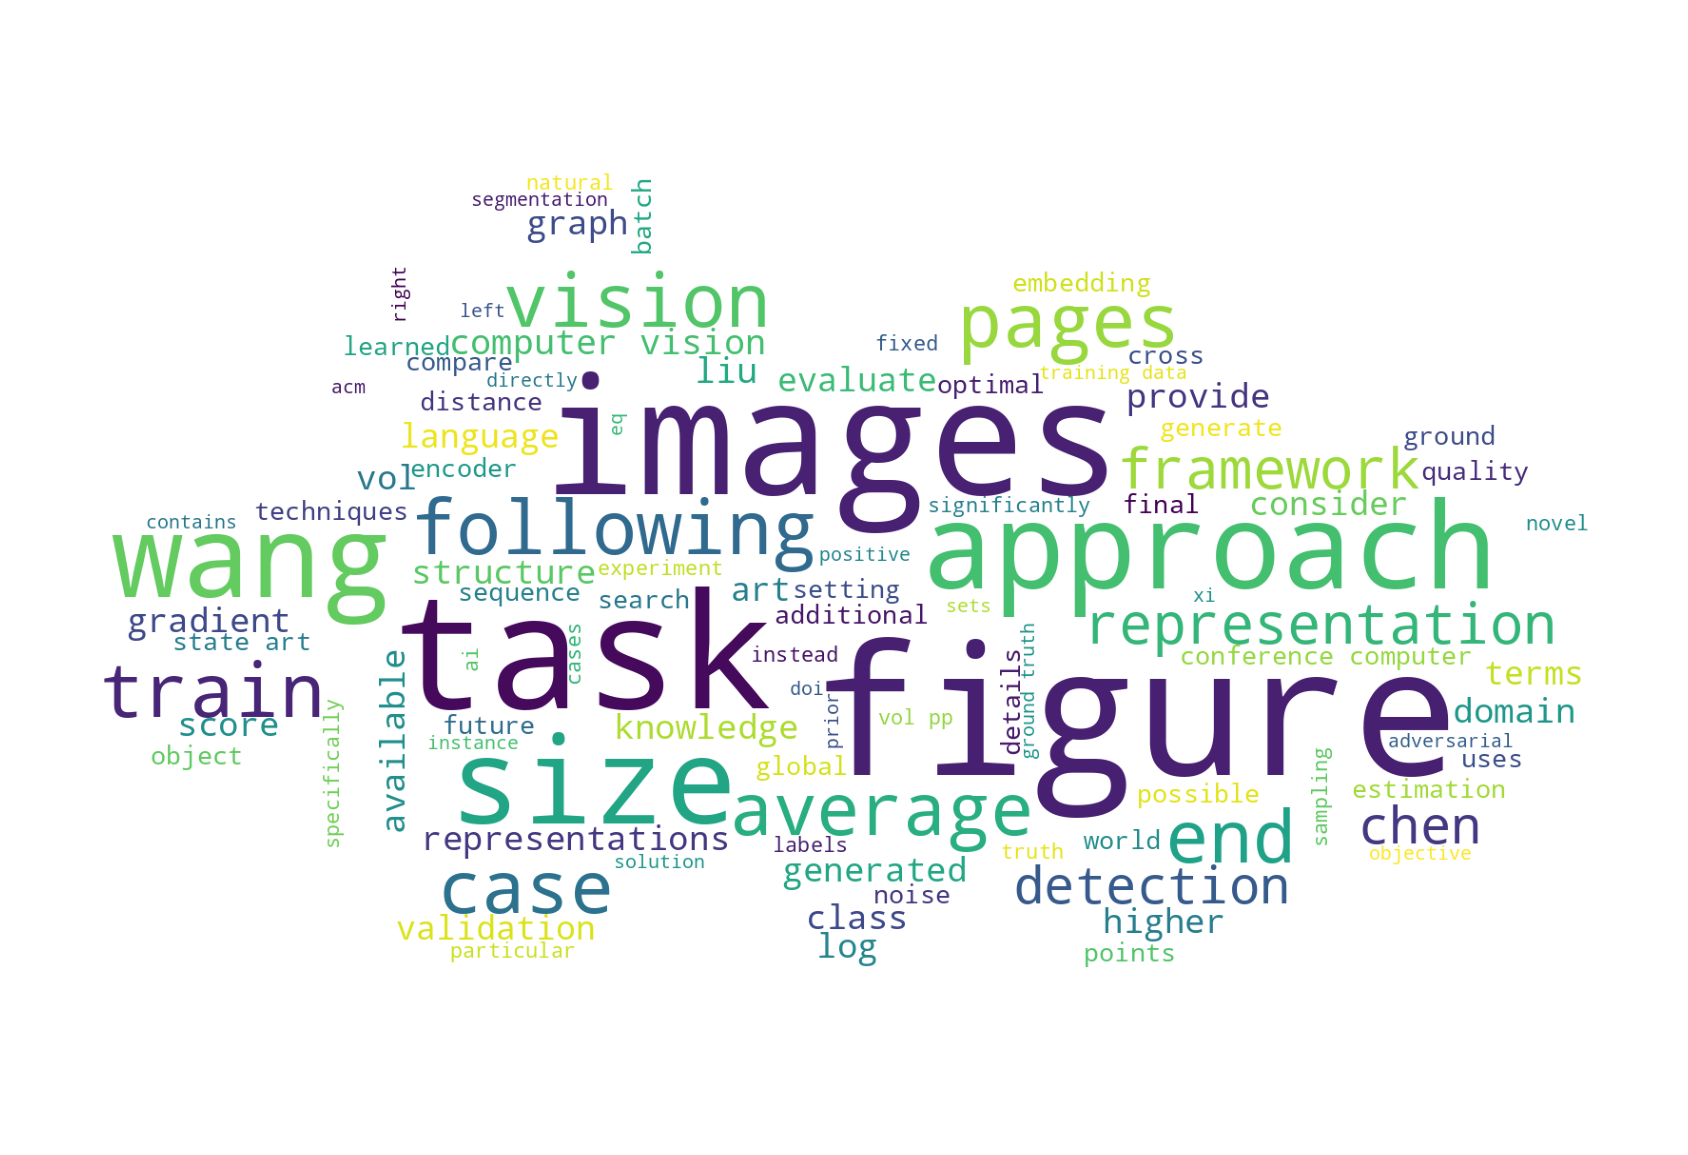

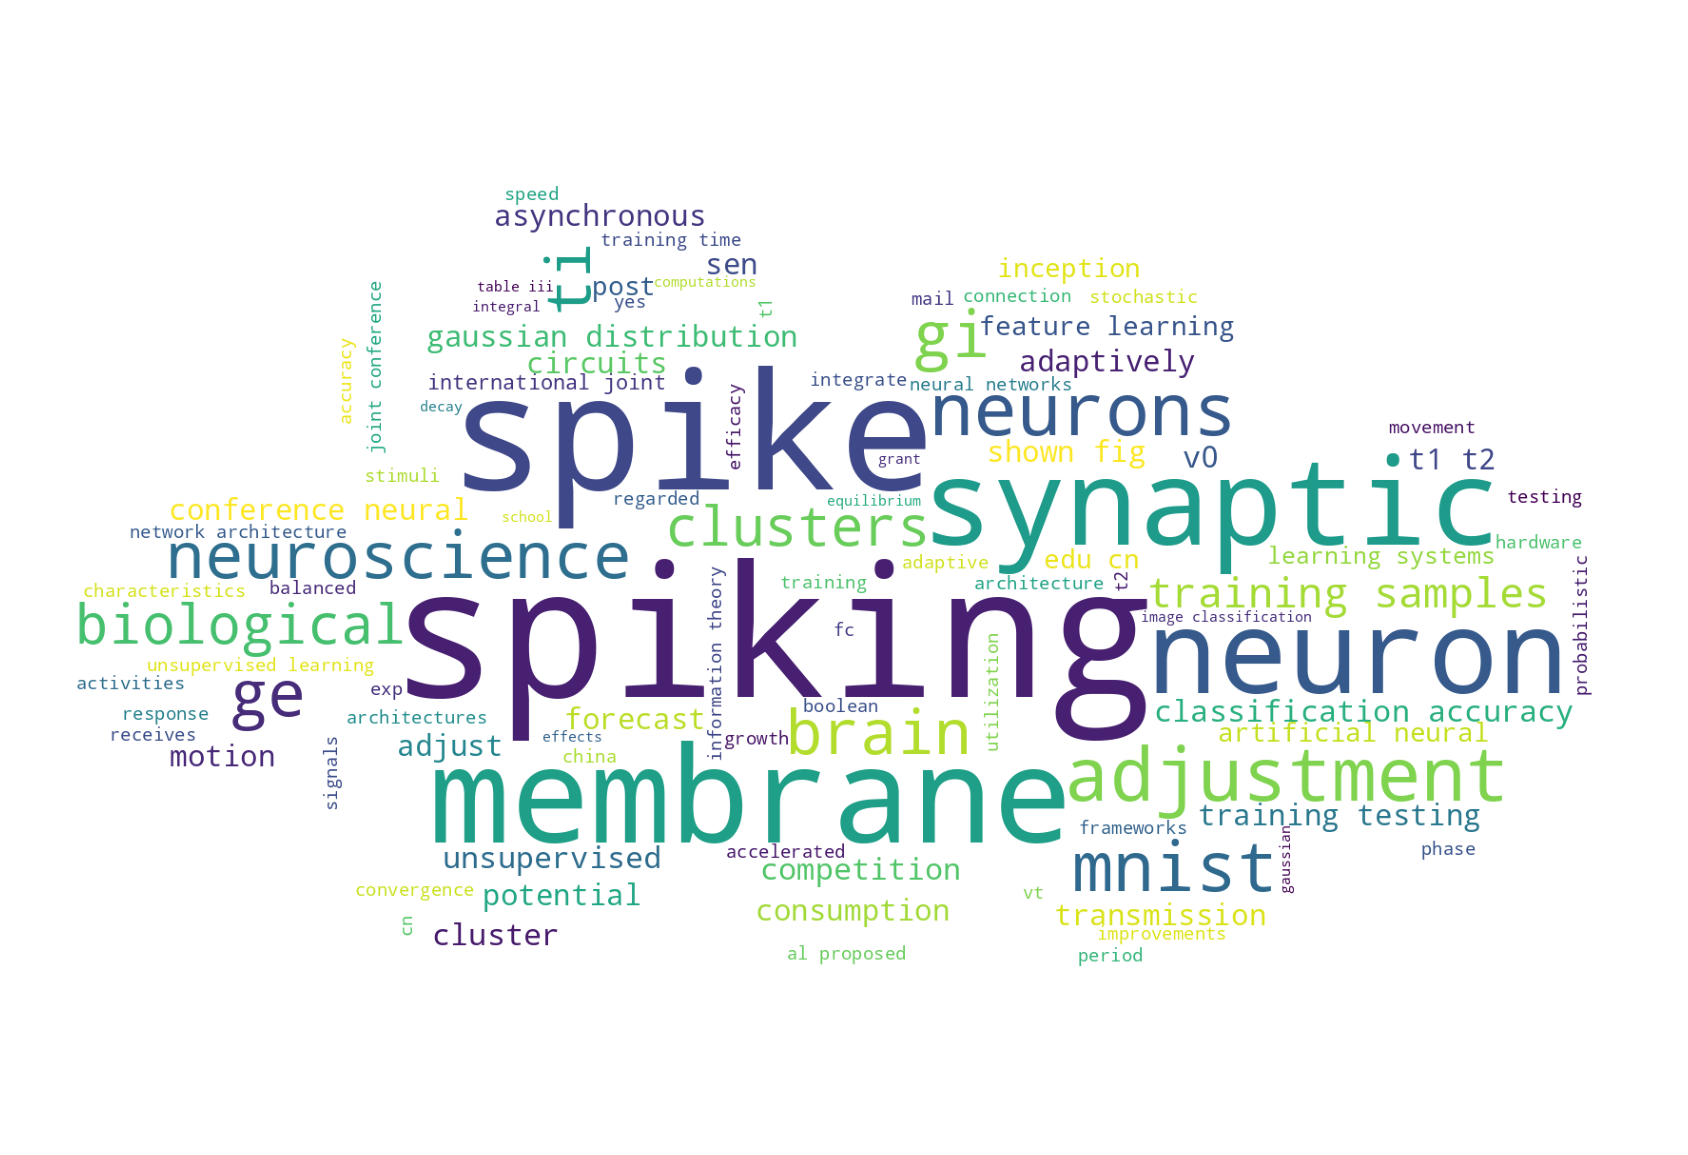

In [191]:
author_name_string = new_author.replace(" ", "-")
plot_word_cloud(reduce_dict_list(u), f"result_images/unknown-{author_name_string}-{author_category_name}.png")
plot_word_cloud(reduce_dict_list(k), f"result_images/known-{author_name_string}-{author_category_name}.png")

# Categories

In [31]:
all_cats = {}

for pid, _cats in categories.items():
    for cat in _cats:
        if cat == "cs.AI":
            pass
#             print(pid, _cats)
        try:
            all_cats[cat] = all_cats.get(cat, []) + [out["X"][xtoi[pid]]]
        except KeyError:
            pass

for cat in all_cats.keys():
    all_cats[cat] = sum(all_cats[cat]).toarray()

In [32]:
tfidf = []
cats_labels = []
for cat, profile in all_cats.items():
    tfidf.append(profile)
    cats_labels.append(cat)
tfidf = np.array(tfidf).reshape((len(cats_labels), -1))

cats_similarity = cosine_similarity(tfidf, tfidf)

cat_word_rating = (np.identity(cats_similarity.shape[0]) * 1 / cats_similarity.sum(axis=1)).dot(cats_similarity.dot(tfidf))

In [33]:
cat_unknown_words = {}
cat_known_words = {}
for u_id in tqdm(range(cat_word_rating.shape[0])):
    cat_known_words[cats_labels[u_id]] = {}
    cat_unknown_words[cats_labels[u_id]] = {}
    for word, idx in meta['vocab'].items():
        if tfidf[u_id][idx] > 0: 
            cat_known_words[cats_labels[u_id]][word] = tfidf[u_id][idx]
        else:
            cat_unknown_words[cats_labels[u_id]][word] = cat_word_rating[u_id][idx]

100%|██████████| 360/360 [00:02<00:00, 123.10it/s]


In [34]:
def pub_from_category(category, max_number = 5):
    i = 0
    for pid, j in db.items():
        if any([category in a["term"] for a in j["tags"]]):
            pprint.pprint(j)
            i+=1
            if i == max_number:
                return
            

def words_from_cat(category):
    known = list(reversed(sorted([{k: v} for k,v in cat_known_words[category].items()], key=lambda x: list(x.values())[0])))
    unknown = list(reversed(sorted([{k: v} for k,v in cat_unknown_words[category].items()], key=lambda x: list(x.values())[0])))
    known, unknown = map(lambda x: list(filter(lambda y: list(y.keys())[0] not in MY_STOPWORDS, x)), [known, unknown])
    return known, unknown

In [173]:
category_name = "q-bio.NC"
kn_cat, unk_cat = words_from_cat(category_name)
print("Known:\n{}\n\n\nUnknown:\n{}".format("\n".join(map(str, kn_cat[:20])), "\n".join(map(str, unk_cat[:20]))))

Known:
{'brain': 4.099636461645528}
{'neuroscience': 3.973935786293533}
{'cortex': 3.4261543396429937}
{'synaptic': 3.3933657588676995}
{'activity': 3.2978217526838205}
{'neurons': 3.254649686852434}
{'neuron': 3.2377445952512334}
{'spiking': 3.1449173882717427}
{'neuronal': 3.1103816927840384}
{'cortical': 2.9761455505021583}
{'spike': 2.762247619372622}
{'dynamics': 2.3411646261367967}
{'stimuli': 2.3358755999665437}
{'biological': 2.326181279650662}
{'stimulus': 2.2468302377364036}
{'connectivity': 2.234495367595349}
{'cognitive': 2.117849671805175}
{'functional': 2.047315952847501}
{'responses': 1.9569419122264087}
{'neural': 1.9162055992540792}


Unknown:
{'corr': 0.1603306667982652}
{'tn': 0.15023433904449798}
{'inequalities': 0.14353564703834087}
{'encoder decoder': 0.14028884930430216}
{'traffic': 0.13869592061498273}
{'high probability': 0.13730723550056864}
{'nlp': 0.13691346190672632}
{'xt xt': 0.13080757243094904}
{'covid': 0.12437772003874767}
{'fairness': 0.12400894570806

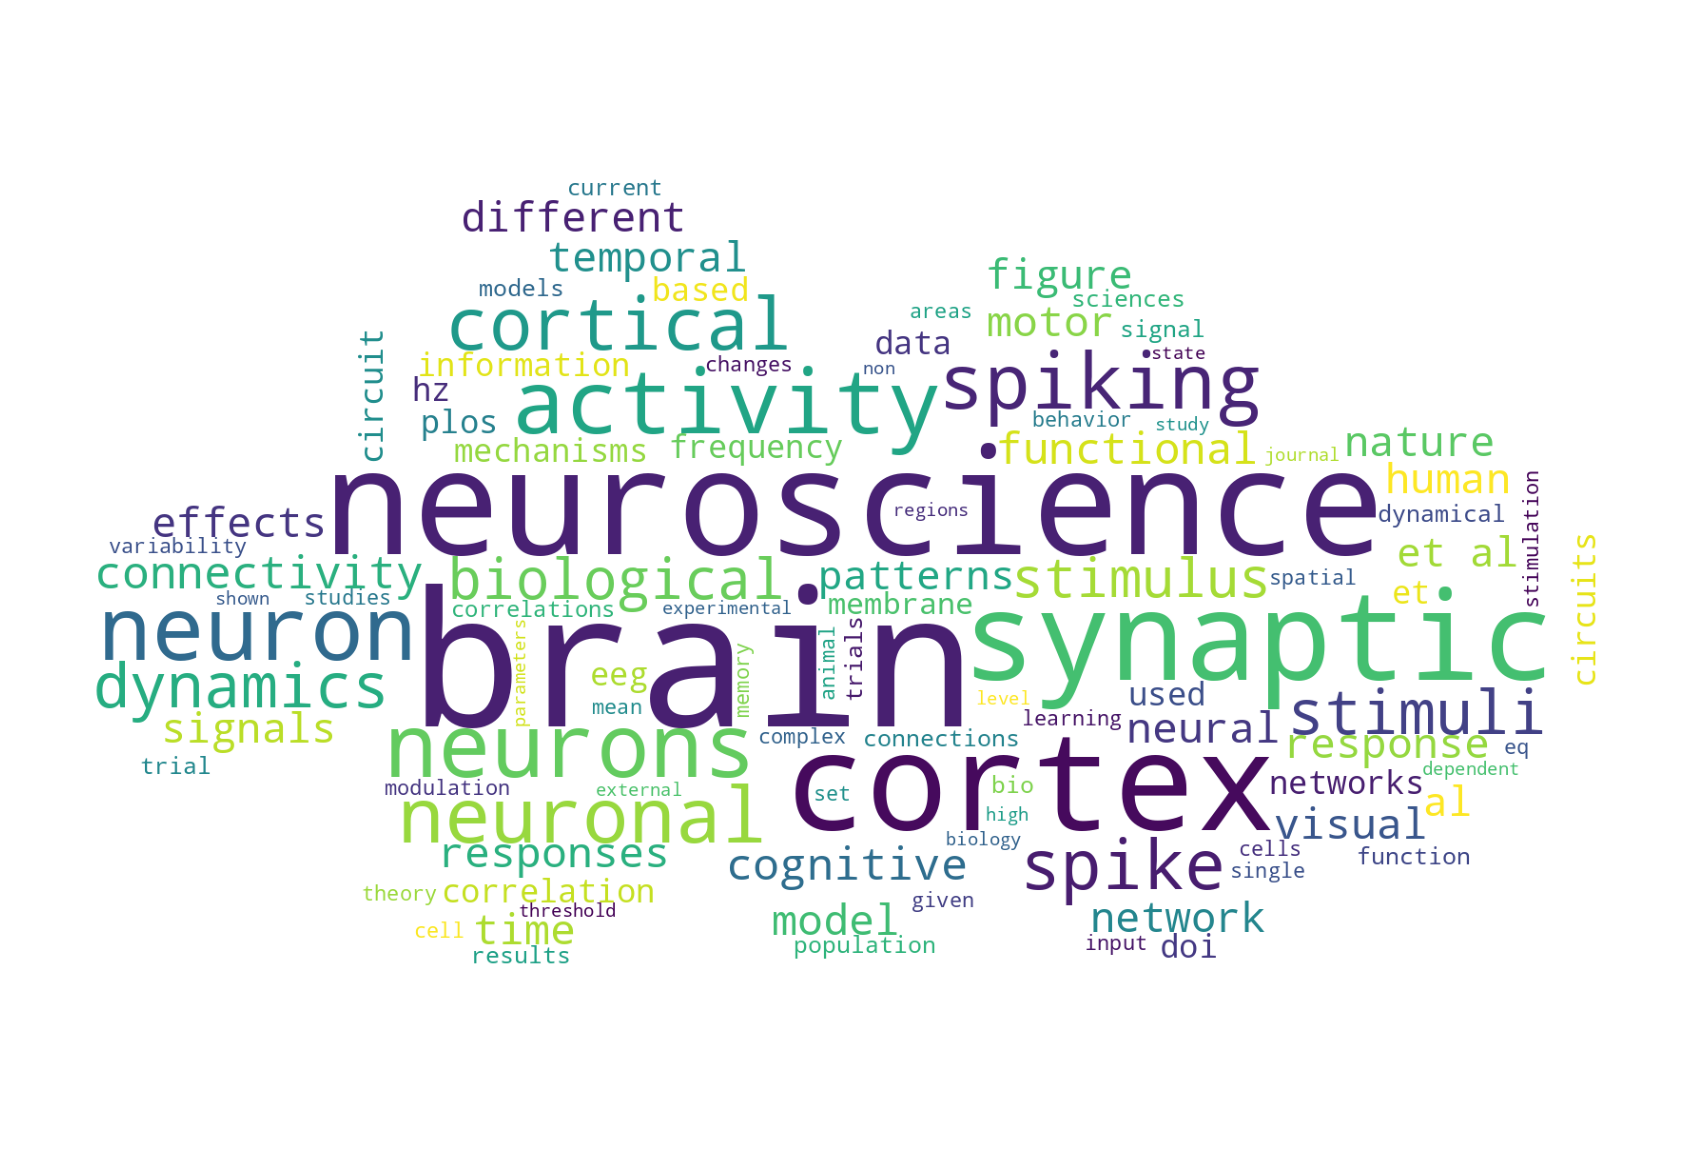

In [174]:
plot_word_cloud(reduce_dict_list(kn_cat), f"result_images/{category_name}.png")

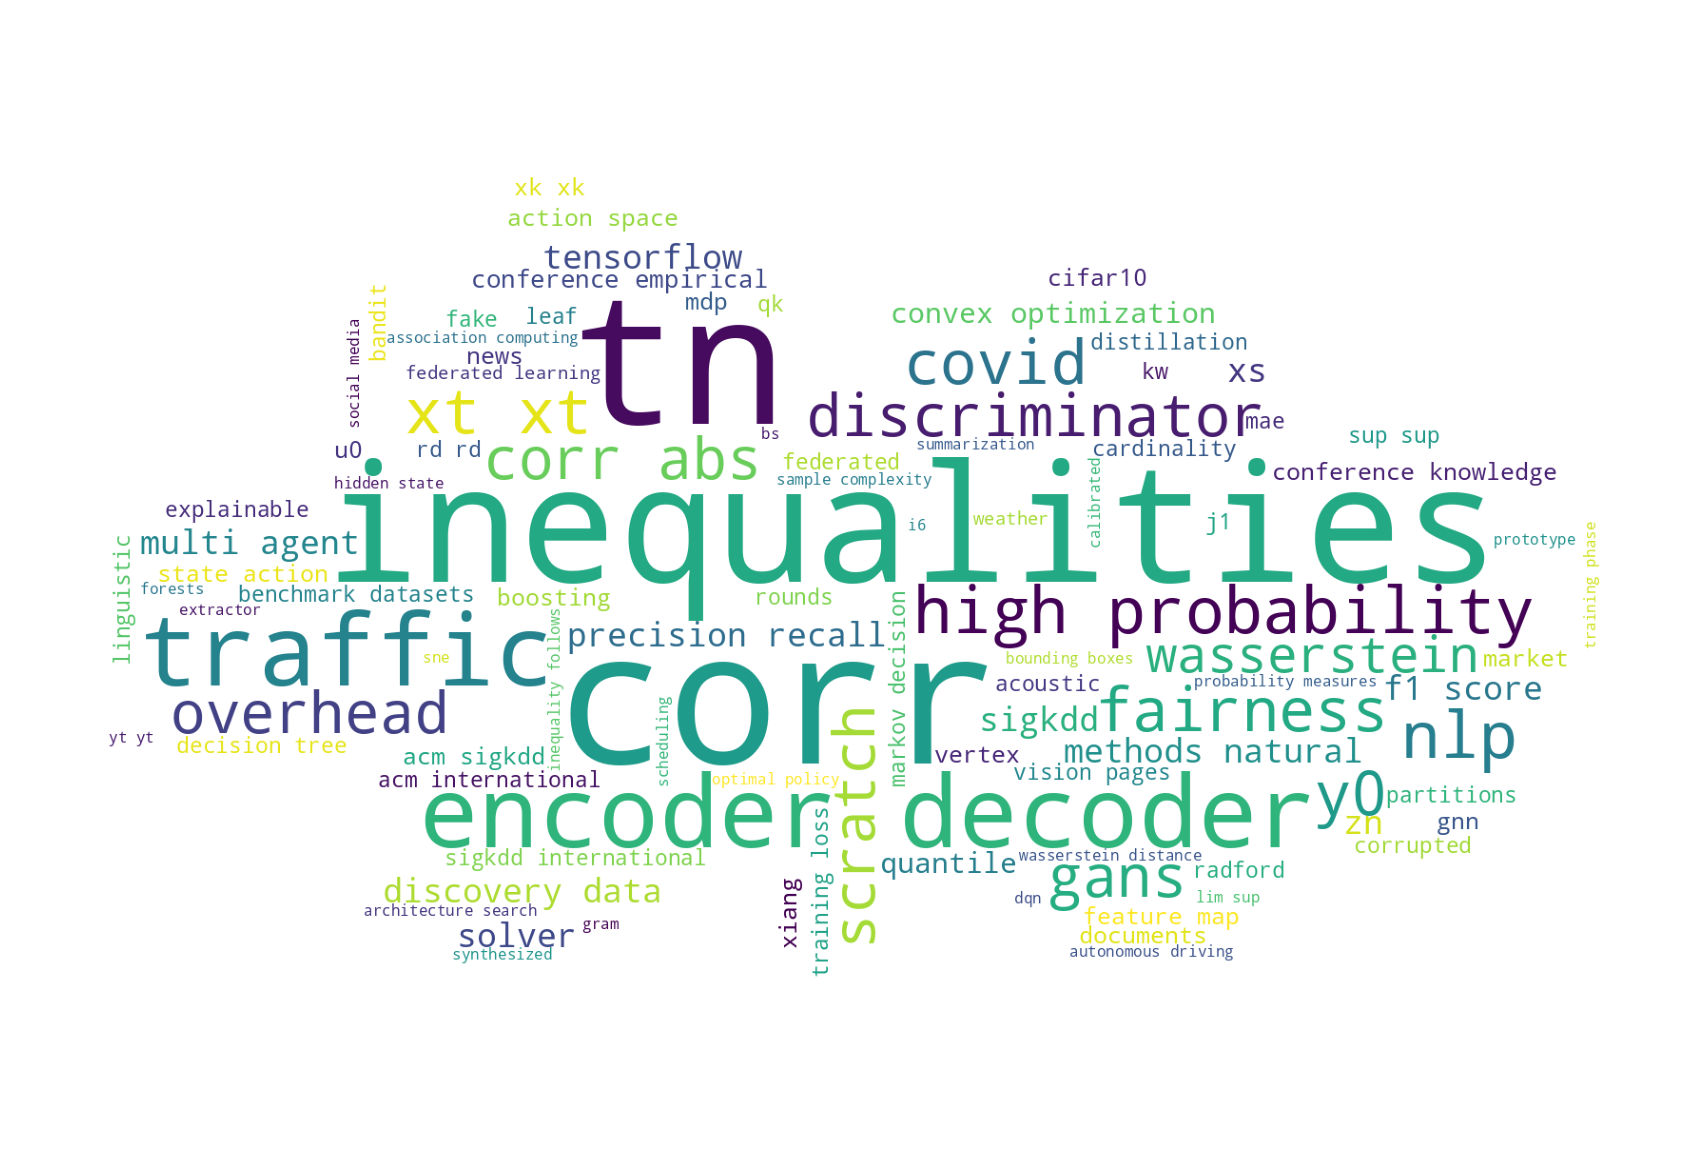

In [175]:
plot_word_cloud(reduce_dict_list(unk_cat))

In [187]:
pub_from_category(category_name, 5)

{'_rawid': '1912.06686',
 '_version': 2,
 'arxiv_primary_category': {'scheme': 'http://arxiv.org/schemas/atom',
                            'term': 'q-bio.NC'},
 'author': 'Tim Hahn',
 'author_detail': {'name': 'Tim Hahn'},
 'authors': [{'name': 'Claas Flint'},
             {'name': 'Micah Cearns'},
             {'name': 'Nils Opel'},
             {'name': 'Ronny Redlich'},
             {'name': 'David M. A. Mehler'},
             {'name': 'Daniel Emden'},
             {'name': 'Nils R. Winter'},
             {'name': 'Ramona Leenings'},
             {'name': 'Simon B. Eickhoff'},
             {'name': 'Tilo Kircher'},
             {'name': 'Axel Krug'},
             {'name': 'Igor Nenadic'},
             {'name': 'Volker Arolt'},
             {'name': 'Scott Clark'},
             {'name': 'Bernhard T. Baune'},
             {'name': 'Xiaoyi Jiang'},
             {'name': 'Udo Dannlowski'},
             {'name': 'Tim Hahn'}],
 'guidislink': True,
 'id': 'http://arxiv.org/abs/1912.06686v

In [39]:
# all_authors_words_rating = {}
# authors_sim = {}

# for author in tqdm(all_authors.keys()):
#     all_authors_words_rating[author] = {}
#     denominator = 0
#     for _author in tqdm(all_authors.keys()):
#         if author == _author: continue
#         author_sim = authors_sim.get((author, _author), cosine_similarity(all_authors[author], all_authors[_author]))
#         authors_sim[(author, _author)] = author_sim
#         authors_sim[(_author, author)] = author_sim
        
#         denominator += author_sim
#         for word, idx in meta['vocab'].items():
#             all_authors_words_rating[author][word] = all_authors_words_rating[author].get(word, 0) + \
#                                                      author_sim * all_authors[_author][0][idx]
#     for word in all_authors_words_rating[author].keys():
#         all_authors_words_rating[author][word] = all_authors_words_rating[author][word] / denominator                   

In [ ]:
all_authors

In [193]:
reduce_dict_list(kn_cat)

{'brain': 4.099636461645528,
 'neuroscience': 3.973935786293533,
 'cortex': 3.4261543396429937,
 'synaptic': 3.3933657588676995,
 'activity': 3.2978217526838205,
 'neurons': 3.254649686852434,
 'neuron': 3.2377445952512334,
 'spiking': 3.1449173882717427,
 'neuronal': 3.1103816927840384,
 'cortical': 2.9761455505021583,
 'spike': 2.762247619372622,
 'dynamics': 2.3411646261367967,
 'stimuli': 2.3358755999665437,
 'biological': 2.326181279650662,
 'stimulus': 2.2468302377364036,
 'connectivity': 2.234495367595349,
 'cognitive': 2.117849671805175,
 'functional': 2.047315952847501,
 'responses': 1.9569419122264087,
 'neural': 1.9162055992540792,
 'model': 1.8883532765516382,
 'response': 1.8676159310701186,
 'motor': 1.831063093570332,
 'visual': 1.816184787987531,
 'time': 1.7966925072619153,
 'temporal': 1.7429257334487342,
 'network': 1.737446059867226,
 'nature': 1.6994715582158975,
 'signals': 1.6733363674454402,
 'human': 1.6640918005178567,
 'different': 1.6461899078154902,
 'effec

In [195]:
author_name_string

'Shanlin-Xiao'

In [228]:
#plot_word_cloud(reduce_dict_list(u), f"result_images/unknown-{author_name_string}-{author_category_name}.png")
#reduce_dict_list(u)
known_by_author = reduce_dict_list(k)
unknown_by_author = reduce_dict_list(u)
unknown_by_author.update({x:v/300 for x,v in reduce_dict_list(kn_cat).items() if x not in known_by_author})

In [ ]:
plot_word_cloud(unknown_by_author, f"result_images/unknown-{author_name_string}-{author_category_name}.png")